## https://www.kaggle.com/datasets/andrea2727/dataset-of-aquatic-animals

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
import pathlib
import matplotlib.pyplot as plt
import numpy as np
import PIL

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
data_dir = 'aqua_animal'
data_dir = pathlib.Path(data_dir)
print(data_dir)

aqua_animal


In [3]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)


11699


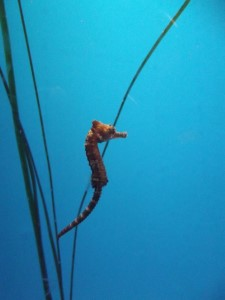

In [4]:
Seahorse = list(data_dir.glob('Seahorse/*'))
PIL.Image.open(str(Seahorse[0]))

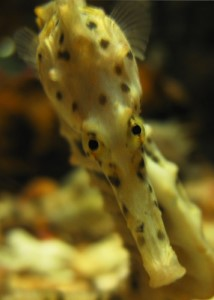

In [5]:
PIL.Image.open(str(Seahorse[1]))

In [6]:
batch_size = 32
img_height = 180
img_width = 180

In [7]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 11742 files belonging to 19 classes.
Using 9394 files for training.


In [8]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 11742 files belonging to 19 classes.
Using 2348 files for validation.


In [9]:
class_names = train_ds.class_names
print(class_names)
print(len(class_names))

['Corals', 'Crabs', 'Dolphin', 'Eel', 'Jelly Fish', 'Lobster', 'Nudibranchs', 'Octopus', 'Penguin', 'Puffers', 'Sea Rays', 'Sea Urchins', 'Seahorse', 'Seal', 'Sharks', 'Squid', 'Starfish', 'Turtle_Tortoise', 'Whale']
19


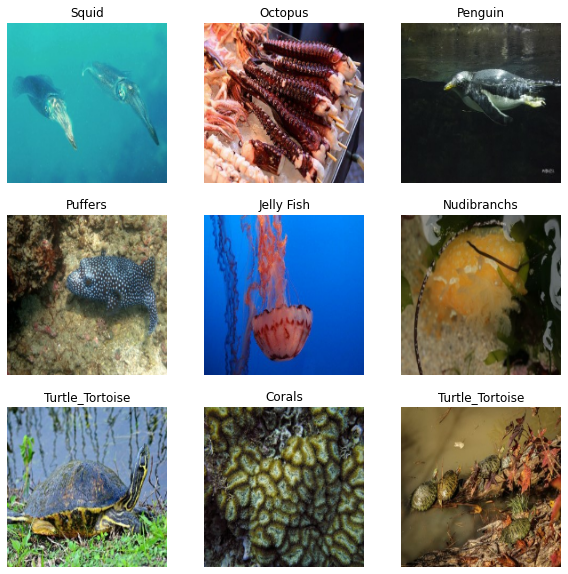

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")


In [11]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break


(32, 180, 180, 3)
(32,)


In [12]:
train_ds

<BatchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [13]:
AUTOTUNE = tf.data.AUTOTUNE
print(AUTOTUNE)

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


-1


In [14]:
normalization_layer = layers.Rescaling(1./255)


In [15]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))


0.077941135 1.0


In [16]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])


In [17]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [18]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [19]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)


Epoch 1/10
294/294 [==============================] - 76s 258ms/step - loss: 2.2905 - accuracy: 0.2991 - val_loss: 2.0791 - val_accuracy: 0.3590
Epoch 2/10
294/294 [==============================] - 69s 235ms/step - loss: 1.9520 - accuracy: 0.3898 - val_loss: 1.9605 - val_accuracy: 0.3888
Epoch 3/10
294/294 [==============================] - 69s 234ms/step - loss: 1.6697 - accuracy: 0.4760 - val_loss: 1.8898 - val_accuracy: 0.4204
Epoch 4/10
294/294 [==============================] - 69s 233ms/step - loss: 1.3271 - accuracy: 0.5797 - val_loss: 1.9234 - val_accuracy: 0.4178
Epoch 5/10
294/294 [==============================] - 71s 242ms/step - loss: 0.9423 - accuracy: 0.6985 - val_loss: 2.1510 - val_accuracy: 0.3944
Epoch 6/10
294/294 [==============================] - 73s 250ms/step - loss: 0.5714 - accuracy: 0.8225 - val_loss: 2.7052 - val_accuracy: 0.3837
Epoch 7/10
294/294 [==============================] - 77s 263ms/step - loss: 0.3515 - accuracy: 0.8972 - val_loss: 2.9696 - val_ac

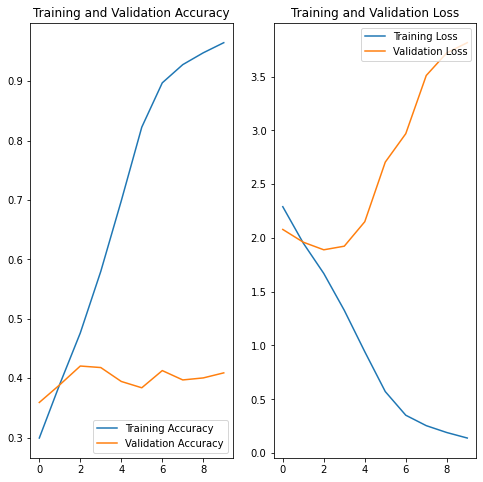

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [23]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)


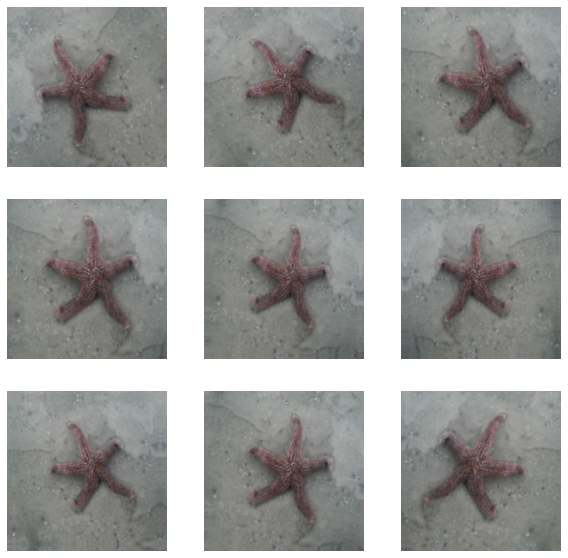

In [24]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")


In [25]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])


In [26]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [27]:
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                  

In [28]:
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)


Epoch 1/15
294/294 [==============================] - 85s 283ms/step - loss: 2.2856 - accuracy: 0.3014 - val_loss: 2.1372 - val_accuracy: 0.3386
Epoch 2/15
294/294 [==============================] - 89s 302ms/step - loss: 2.0376 - accuracy: 0.3618 - val_loss: 2.0575 - val_accuracy: 0.3578
Epoch 3/15
294/294 [==============================] - 85s 290ms/step - loss: 1.8831 - accuracy: 0.4048 - val_loss: 1.9295 - val_accuracy: 0.3982
Epoch 4/15
294/294 [==============================] - 86s 292ms/step - loss: 1.7802 - accuracy: 0.4347 - val_loss: 1.8448 - val_accuracy: 0.4310
Epoch 5/15
294/294 [==============================] - 85s 288ms/step - loss: 1.6957 - accuracy: 0.4664 - val_loss: 1.8241 - val_accuracy: 0.4280
Epoch 6/15
294/294 [==============================] - 85s 288ms/step - loss: 1.6127 - accuracy: 0.4897 - val_loss: 1.9125 - val_accuracy: 0.4178
Epoch 7/15
294/294 [==============================] - 85s 288ms/step - loss: 1.5354 - accuracy: 0.5064 - val_loss: 1.7273 - val_ac

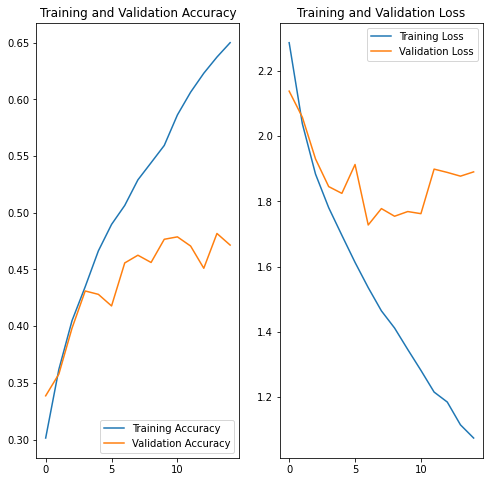

In [29]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [31]:
image_path = "aqua_animal/Squid/34998391_b2c4cfd49b_o.jpg"
# plt.imshow(image_path)
img = tf.keras.utils.load_img(
    image_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 207ms/step
This image most likely belongs to Corals with a 41.07 percent confidence.
